In [1]:
# Change accordingly
import sys
sys.path.insert(0, "..")

In [3]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from isvd import face_interval_generator as fgen
from tqdm import tqdm

# Interval Face Generator

In [3]:
path = "../data/ORL_32x32.mat"
pix = 32
all_faces = fgen.face_loader(path, pix)

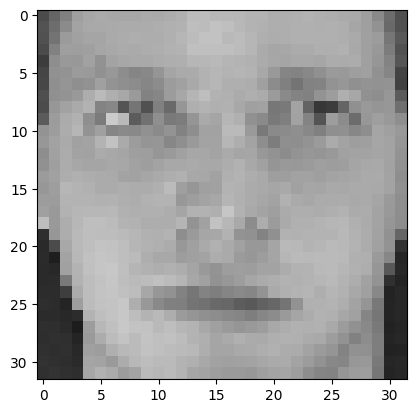

In [4]:
plt.imshow(all_faces[0][0], cmap="gray", vmin=0, vmax=255)

In [5]:
delta, img_low, img_up = fgen.compute_interval(all_faces[0][0], 3, 2)

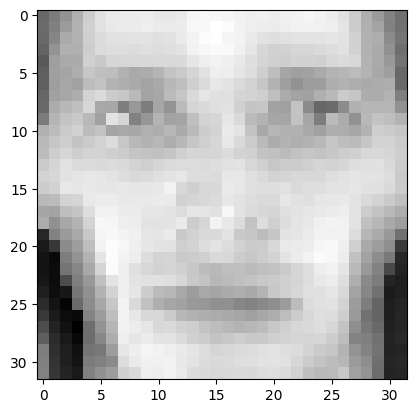

In [6]:
plt.imshow(img_low, cmap="gray")

In [8]:
faces_avg = []
faces_low = []
faces_up = []

for faces in tqdm(all_faces):
    temp_avg = []
    temp_low = []
    temp_up = []
    for face in faces:
        delta, img_low, img_up = fgen.compute_interval(face, 3, 2)
        temp_low.append(img_low.flatten())
        temp_up.append(img_up.flatten())
        temp_avg.append(face.flatten())
    faces_avg.append(temp_avg)
    faces_low.append(temp_low)
    faces_up.append(temp_up)

100%|██████████| 40/40 [00:24<00:00,  1.65it/s]


In [15]:
average_faces = np.concatenate(faces_avg)
low_faces = np.concatenate(faces_low)
up_faces = np.concatenate(faces_up)

In [16]:
scipy.io.savemat("../isvd/data/intv_faces.mat", {"lo": low_faces, "up": up_faces, "avg": average_faces})